In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

# Do the following in the iris dataset.


# 1. Read the dataset to the python environment

In [2]:
data=pd.read_excel("Downloads/iris(1).xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#filling missing values

data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 2. Do necessary pre-processing steps.

Text(0.5, 1.0, 'Box plot of PW')

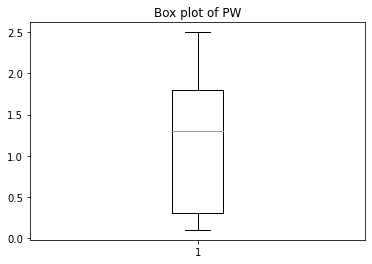

In [9]:
#Checking outliers.

plt.boxplot(data['PW'])
plt.title("Box plot of PW")

Text(0.5, 1.0, 'Box plot of PW')

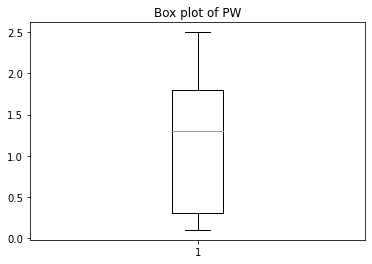

In [10]:
plt.boxplot(data['PW'])
plt.title("Box plot of PW")

Text(0.5, 1.0, 'Box plot of SL')

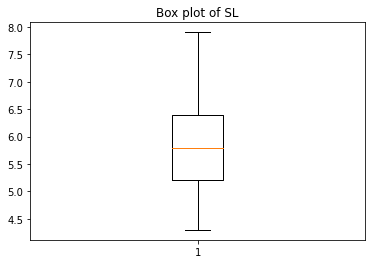

In [11]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')


Text(0.5, 1.0, 'Box plot of SW')

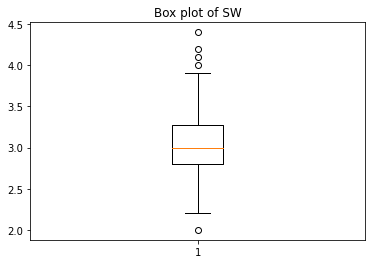

In [12]:
plt.boxplot(data['SW'])
plt.title("Box plot of SW")

Only SW has some outliers.

In [13]:
#Removing outliers.

Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

IQR=Q3-Q1

up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

print(up_lim)
print(low_lim)

outlier=[]
for i in data["SW"]:
    if ((i>up_lim) or (i<low_lim)):
        outlier.append(i)

2.8
3.0
3.25
3.9250000000000003
2.1249999999999996


In [14]:
ind=data['SW']>up_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [15]:
data.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

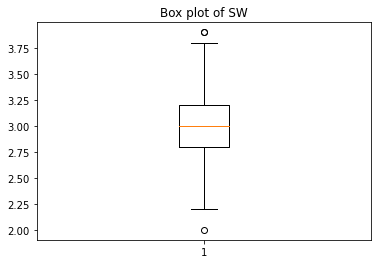

In [16]:
plt.boxplot(data['SW'])

plt.title("Box plot of SW")

In [17]:
#encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Classification']= le.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [18]:
#splitting
y=data['Classification']
x=data.drop('Classification',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE:',mean_squared_error(y_test,pred))
print('R squared score:',r2_score(y_test,pred))

MSE: 0.04868594195940339
R squared score: 0.9332052625556966


In [20]:
#scaling using min max

data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [21]:
x=data.drop('Classification',axis=1)

In [22]:
 x.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.016438,3.845205,1.225342
std,0.817166,0.382555,1.706593,0.755834
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [23]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
pred=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,pred))
print('R squared score:',r2_score(y_test,pred))

MSE: 0.04868594195940352
R squared score: 0.9332052625556964


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [24]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
model=log_model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,f1_score

In [26]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred),4))
print('Precision is: ',round(precision_score(y_test,y_pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,y_pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,y_pred,average='micro'),4))

accuracy is:  0.9333
Precision is:  0.9333
recall score is:  0.9333
f1 score is:  0.9333


Text(0, 0.5, 'Accuracy')

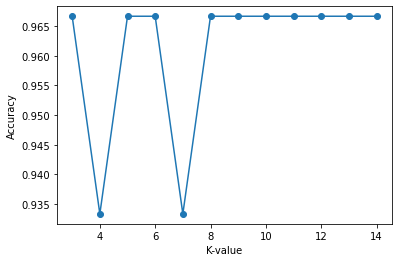

In [27]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')


In [28]:
classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

print('Accuracy :',accuracy_score(y_test,y_pred))
print("precision :",round(precision_score(y_test,y_pred,average="micro"),4))
print("Recall score :",round(recall_score(y_test,y_pred,average='micro'),4))
print("f1_score :",round(f1_score(y_test,y_pred,average='micro'),4))

Accuracy : 0.9666666666666667
precision : 0.9667
Recall score : 0.9667
f1_score : 0.9667


In [29]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

print('Accuracy :',accuracy_score(y_test,y_pred))
print("precision :",round(precision_score(y_test,y_pred,average="micro"),4))
print("Recall score :",round(recall_score(y_test,y_pred,average='micro'),4))
print("f1_score :",round(f1_score(y_test,y_pred,average='micro'),4))

Accuracy : 0.9333333333333333
precision : 0.9333
Recall score : 0.9333
f1_score : 0.9333


In [30]:
#SVM

from sklearn.svm import SVC



svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred  = dt_model.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  0.9333333333333333
Precision is:  0.9333333333333333
recall score is:  0.9333333333333333
f1 score is:  0.9333333333333333


In [31]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred,average='micro'))
print('recall score is: ',recall_score(y_test,y_pred,average='micro'))
print('f1 score is: ',f1_score(y_test,y_pred,average='micro'))


accuracy is:  0.9333333333333333
Precision is:  0.9333333333333333
recall score is:  0.9333333333333333
f1 score is:  0.9333333333333333


Based on the accuracy values, Decision tree and Random forest are the best.